# Tercera sesión

Recapitulación de la regresión lineal. 

In [2]:
# Librerias
library(dplyr)
library(ggplot2)

getwd()

# 1. Abrimos las bases
LAhomes <- read.csv("BDs/LAhomes.csv")

# Exploramos contenido
head(LAhomes)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



[1] "/home/juve/Escritorio/Sesión 3. Regreso a la Regresión"

city,type,bed,bath,garage,sqft,pool,spa,price
Long Beach,,0,1,,513,,NA,119000
Long Beach,,0,1,,550,,NA,153000
Long Beach,,0,1,,550,,NA,205000
Long Beach,,0,1,1,1030,,NA,300000
Long Beach,,0,1,1,1526,,NA,375000
Long Beach,,1,1,,552,,NA,159900


$city
[1] "factor"

$type
[1] "factor"

$bed
[1] "integer"

$bath
[1] "numeric"

$garage
[1] "factor"

$sqft
[1] "integer"

$pool
[1] "factor"

$spa
[1] "logical"

$price
[1] "numeric"


Call:
lm(formula = fmla, data = LAhomes)

Coefficients:
(Intercept)         sqft  
   -1661892         1486  




Call:
lm(formula = fmla, data = LAhomes)

Residuals:
     Min       1Q   Median       3Q      Max 
-7732777  -363898   246242   601763 50004033 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.662e+06  6.446e+04  -25.78   <2e-16 ***
sqft         1.486e+03  2.271e+01   65.44   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1859000 on 1592 degrees of freedom
Multiple R-squared:  0.729,	Adjusted R-squared:  0.7288 
F-statistic:  4282 on 1 and 1592 DF,  p-value: < 2.2e-16


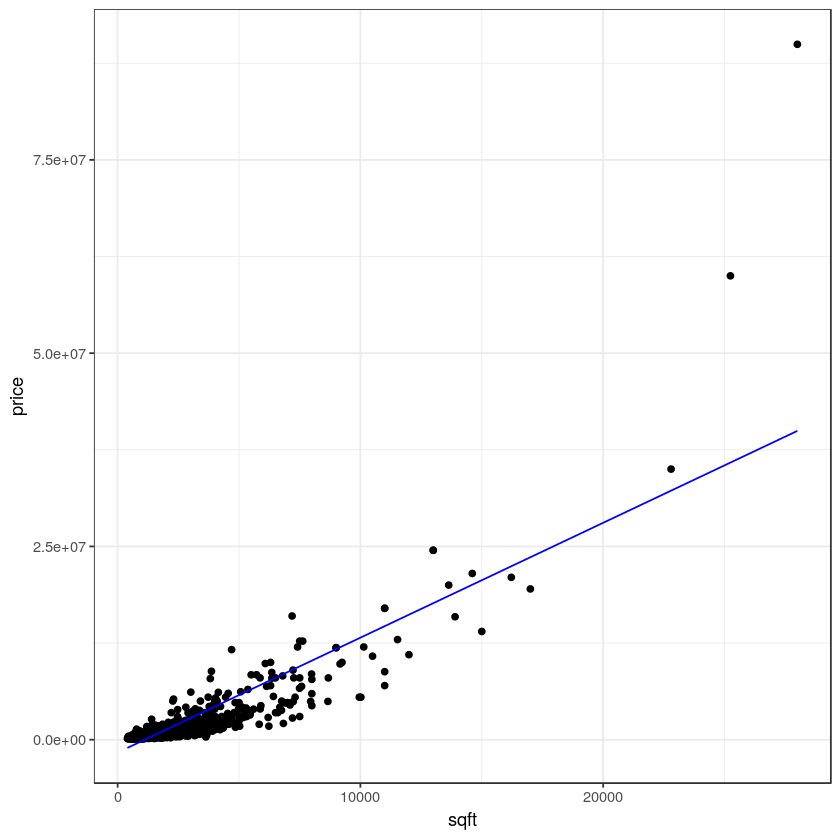

In [3]:
#################################
# 1. Precio de las casas en LA. #
#################################

# 0. Exploramos los datos: 
lapply(LAhomes, class)

# 1. Determinamos la formula
fmla <- price ~ sqft
#fmla <- price ~ aleat

# 2. Aplicamos el modelo
model <- lm(fmla, LAhomes)
print(model)

# 3. Checamos mayor informaci'on del modelo
summary(model)

# 4. Prediction 
LAhomes$pred1 <- predict(model)

# 5. Graficamos
ggplot(LAhomes, 
       aes(x = sqft, y = price)) + 
  geom_point() + 
  geom_line(aes(x = sqft, y = pred1), colour = "blue") + 
  theme_bw()   # Fondo blanco con rayas grises

# Preguntas... que tan buena es esta regresipn para explicar el precio de la vivienda?


In [4]:
##########################
# 2. Tasa de Mortalidad  #
##########################

# 1. Abrimos la base
health <- readxl::read_xls("BDs/health.xls")

# 2. Exploramos los datos
head(health)



deathRate,doctorAvailability,hospitalAvailability,annualPerCapitaIncome,populationDensity
"8,0",78,284,"9,1",109
"9,3",68,433,"8,7",144
"7,5",70,739,"7,2",113
"8,9",96,1792,"8,9",97
"10,2",74,477,"8,3",206
"8,3",111,362,"10,9",124


In [7]:
lapply(health, class)

# 3. Creamos el modelo
fmla1 <- deathRate ~ doctorAvailability
fmla2 <- deathRate ~ hospitalAvailability
fmla3 <- deathRate ~ annualPerCapitaIncome
fmla4 <- deathRate ~ populationDensity
fmla5 <- deathRate ~ populationDensity + annualPerCapitaIncome + hospitalAvailability + doctorAvailability


$deathRate
[1] "numeric"

$doctorAvailability
[1] "numeric"

$hospitalAvailability
[1] "numeric"

$annualPerCapitaIncome
[1] "numeric"

$populationDensity
[1] "numeric"

$pred1
[1] "numeric"

$pred2
[1] "numeric"

$pred3
[1] "numeric"

$pred4
[1] "numeric"

$pred5
[1] "numeric"

In [8]:
# 4. Hacemos las regresiones

model1 <- lm(fmla1, health) 
summary(model1)

model2 <- lm(fmla2, health) 
summary(model2)

model3 <- lm(fmla3, health) 
summary(model3)

model4 <- lm(fmla4, health) 
summary(model4)

model5 <- lm(fmla5, health)
summary(model5)

# 5. Prediccion 
health$pred1 <- predict(model1)
health$pred2 <- predict(model2)
health$pred3 <- predict(model3)
health$pred4 <- predict(model4)
health$pred5 <- predict(model5)


Warning message in printCoefmat(coefs, digits = digits, signif.stars = signif.stars, :
“NAs introducidos por coerción”


Call:
lm(formula = fmla1, data = health)

Residuals:
    Min      1Q  Median      3Q     Max 
-5,5426 -0,9798  0,2387  0,9751  3,7387 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)        8,715905   0,744665  11,704 4,61e-16 ***
doctorAvailability 0,005080   0,006103   0,832    0,409    
---
Signif. codes:  0 ‘***’ 0,001 ‘**’ 0,01 ‘*’ 0,05 ‘.’ 0,1 ‘ ’ 1

Residual standard error: 1,667 on 51 degrees of freedom
Multiple R-squared:  0,0134,	Adjusted R-squared:  -0,005944 
F-statistic: 0,6928 on 1 and 51 DF,  p-value: 0,4091


Warning message in printCoefmat(coefs, digits = digits, signif.stars = signif.stars, :
“NAs introducidos por coerción”


Call:
lm(formula = fmla2, data = health)

Residuals:
    Min      1Q  Median      3Q     Max 
-5,5388 -0,9366  0,0217  0,9567  3,6086 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          8,9796442  0,4699376  19,108   <2e-16 ***
hospitalAvailability 0,0005528  0,0006956   0,795    0,431    
---
Signif. codes:  0 ‘***’ 0,001 ‘**’ 0,01 ‘*’ 0,05 ‘.’ 0,1 ‘ ’ 1

Residual standard error: 1,668 on 51 degrees of freedom
Multiple R-squared:  0,01223,	Adjusted R-squared:  -0,007138 
F-statistic: 0,6315 on 1 and 51 DF,  p-value: 0,4305


Warning message in printCoefmat(coefs, digits = digits, signif.stars = signif.stars, :
“NAs introducidos por coerción”


Call:
lm(formula = fmla3, data = health)

Residuals:
    Min      1Q  Median      3Q     Max 
-5,9811 -0,8620  0,2975  1,1987  2,9530 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)            11,8145     2,0249   5,835 3,72e-07 ***
annualPerCapitaIncome  -0,2659     0,2132  -1,247    0,218    
---
Signif. codes:  0 ‘***’ 0,001 ‘**’ 0,01 ‘*’ 0,05 ‘.’ 0,1 ‘ ’ 1

Residual standard error: 1,654 on 51 degrees of freedom
Multiple R-squared:  0,02958,	Adjusted R-squared:  0,01055 
F-statistic: 1,555 on 1 and 51 DF,  p-value: 0,2181


Warning message in printCoefmat(coefs, digits = digits, signif.stars = signif.stars, :
“NAs introducidos por coerción”


Call:
lm(formula = fmla4, data = health)

Residuals:
    Min      1Q  Median      3Q     Max 
-5,7119 -1,0315  0,1011  1,0413  2,9696 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       10,387997   0,569350  18,245   <2e-16 ***
populationDensity -0,009782   0,004740  -2,064   0,0442 *  
---
Signif. codes:  0 ‘***’ 0,001 ‘**’ 0,01 ‘*’ 0,05 ‘.’ 0,1 ‘ ’ 1

Residual standard error: 1,613 on 51 degrees of freedom
Multiple R-squared:  0,07707,	Adjusted R-squared:  0,05897 
F-statistic: 4,259 on 1 and 51 DF,  p-value: 0,04416


Warning message in printCoefmat(coefs, digits = digits, signif.stars = signif.stars, :
“NAs introducidos por coerción”


Call:
lm(formula = fmla5, data = health)

Residuals:
    Min      1Q  Median      3Q     Max 
-5,6404 -0,7904  0,3053  0,9164  2,7906 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)           12,2662552  2,0201467   6,072 1,95e-07 ***
populationDensity     -0,0094629  0,0048868  -1,936   0,0587 .  
annualPerCapitaIncome -0,3302302  0,2345518  -1,408   0,1656    
hospitalAvailability   0,0005837  0,0007219   0,809   0,4228    
doctorAvailability     0,0073916  0,0069336   1,066   0,2917    
---
Signif. codes:  0 ‘***’ 0,001 ‘**’ 0,01 ‘*’ 0,05 ‘.’ 0,1 ‘ ’ 1

Residual standard error: 1,601 on 48 degrees of freedom
Multiple R-squared:  0,1437,	Adjusted R-squared:  0,07235 
F-statistic: 2,014 on 4 and 48 DF,  p-value: 0,1075


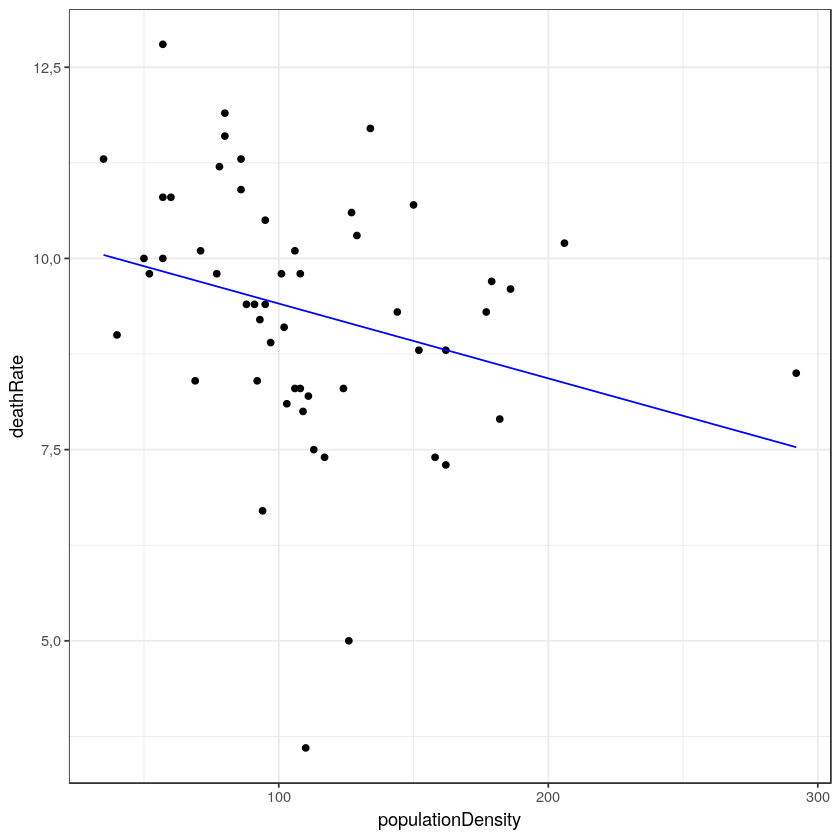

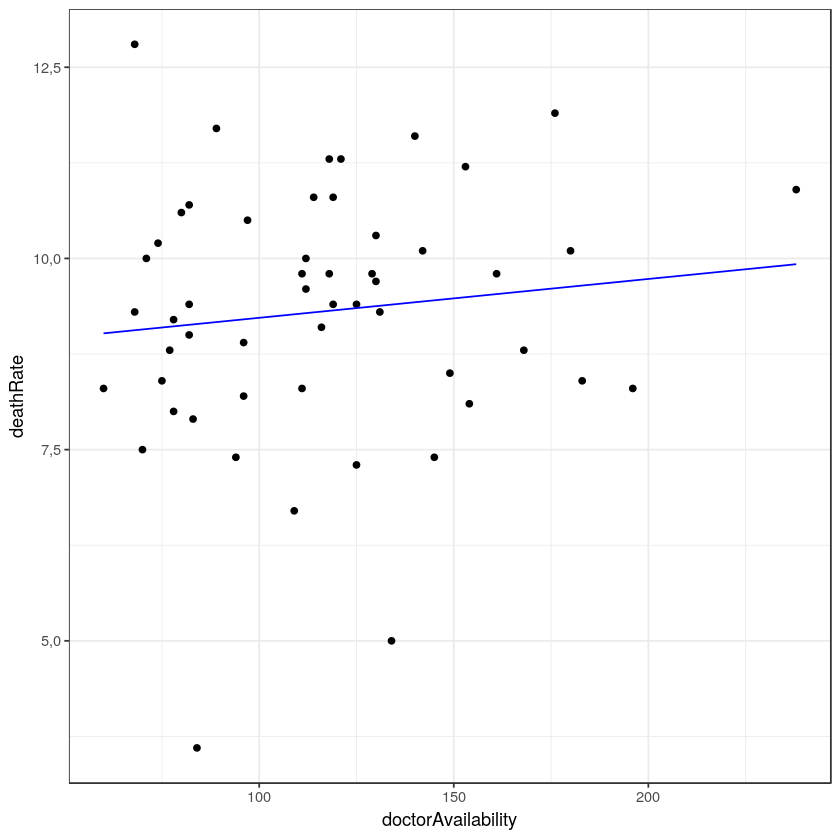

In [9]:
# 6. Grafica

# Sobre popDensity, la mas significativa
ggplot(health, 
       aes(x = populationDensity, y = deathRate)) + 
  geom_point() + 
  geom_line(aes(x = populationDensity, y = pred4), colour = "blue") + 
  theme_bw()   # Fondo blanco con rayas grises

# Sobre DoctorAvailability
ggplot(health, 
       aes(x = doctorAvailability, y = deathRate)) + 
  geom_point() + 
  geom_line(aes(x = doctorAvailability, y = pred1), colour = "blue") + 
  theme_bw()   # Fondo blanco con rayas grises

# COmo podemos ver, en este caso el modelo casi no predice nada. 
# Y es por esto que esta variable no es significante.